#### Part 1: Introduction

Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision?


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats

In [31]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

#### Part 2: Understand the data

In [32]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [33]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [34]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### Part 3: Visualization

Median value of owner-occupied homes: provide a boxplot

[Text(0.5, 0, 'median values'),
 Text(0.5, 1.0, 'Median value of owner-occupied homes')]

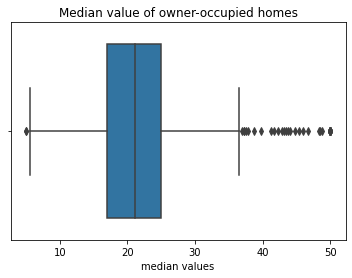

In [44]:
ax = sns.boxplot(x = 'MEDV',data = boston_df)
ax.set(title = 'Median value of owner-occupied homes',xlabel = 'median values')

Make a histogram for the Charles river variable 

[Text(0.5, 0, 'River bound'),
 Text(0.5, 1.0, 'Hisogram of Charles river variable')]

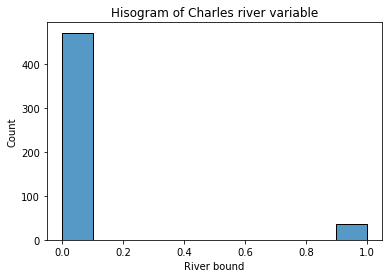

In [63]:
ax = sns.histplot(x = 'CHAS', data = boston_df)
ax.set(title = 'Hisogram of Charles river variable', xlabel = 'River bound')

Provide a boxplot for the MEDV variable vs the AGE variable.  
(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older) 

In [45]:
boston_df.loc[(boston_df['AGE'] <= 35),'age_group'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70),'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70),'age_group'] = '70 and older'

[Text(0, 0.5, 'Median home value')]

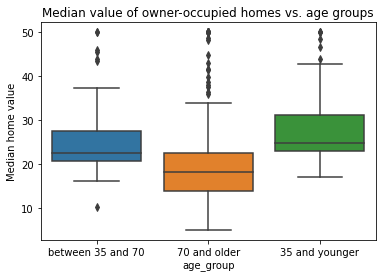

In [48]:
ax = sns.boxplot(x = 'age_group',y ='MEDV',data = boston_df)
ax.set(title = 'Median value of owner-occupied homes vs. age groups')
ax.set(ylabel = 'Median home value')

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

[Text(0, 0.5, 'Nitric oxide concentrations')]

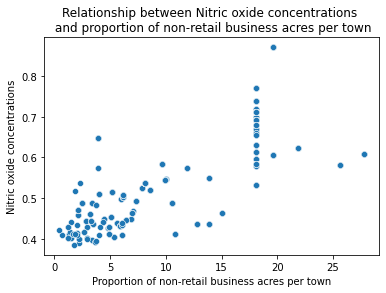

In [57]:
ax = sns.scatterplot(x ='INDUS',y = 'NOX',data = boston_df )
ax.set(title = 'Relationship between Nitric oxide concentrations \n and proportion of non-retail business acres per town')
ax.set(xlabel = 'Proportion of non-retail business acres per town')
ax.set(ylabel = 'Nitric oxide concentrations')

Create a histogram for the pupil to teacher ratio variable

[Text(0.5, 0, 'Ratio'), Text(0.5, 1.0, 'Pupil to teacher ratio')]

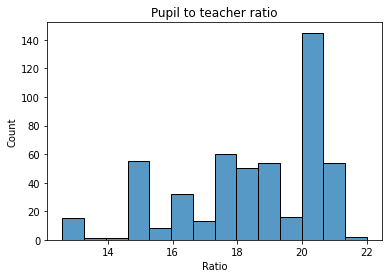

In [56]:
ax = sns.histplot(x = 'PTRATIO',data = boston_df)
ax.set( title = 'Pupil to teacher ratio',xlabel = 'Ratio')

#### Part 4: Hypothesis Testing

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

First, we state our hypothesis:  

    H0 : There is no difference in median values of house bounded by the Charles river or not
    H1 : There is difference in median values of house bounded by the Charles river and houses that are not.  
    
We will use alpha = 0.05
We will use T-test for independent samples. 




In [61]:
# Levene's Test for homegeneity of variance
scipy.stats.levene(boston_df[boston_df['CHAS']==1]['MEDV'],
                   boston_df[boston_df['CHAS']==0]['MEDV'], center = 'mean')

# p_value < 0.003 we reject the null, the variance are not

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [62]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'],
                      boston_df[boston_df['CHAS']==0]['MEDV'],equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

Since the p_value of the t_test is 0.0036 < alpha. We reject the null hypothesis. There is enough statistically significant evidence that there is a difference in median values between homes bound by the Charles and homes that are not. 

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

First we state our hypothesis:

    H0: There is no difference in median values of houses for each proportion of owner occupied units built prior to 1940
    H1: At least one of the means differ

We will use alpha = .05. Because this question requires to compare mean between more than 2 groups, we will use ANOVA test.

First, we need to test for equality of variance using Levene's test

In [64]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV'],
                   boston_df[boston_df['age_group'] == '70 and older']['MEDV'],center = 'mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

p_value of Levene's test is larger than alpha, so we can assume homogeneity of variance.

Now we are going to run ANOVA test.

In [65]:
thirtyfive_younger_medv = boston_df[boston_df['age_group'] == '35 and younger']['MEDV']
thrityfive_seventy_medv = boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV']
seventy_anove_medv = boston_df[boston_df['age_group'] == '70 and older']['MEDV']

In [67]:
f_stat, p_value = scipy.stats.f_oneway(thirtyfive_younger_medv,thrityfive_seventy_medv,seventy_anove_medv)
print(f' F score is {f_stat}')
print(f' p_value is {p_value}')

 F score is 36.40764999196599
 p_value is 1.7105011022702984e-15


Since the p_value is smaller than alpha. We reject the null hypothesis. There is enough statistical evidence to conclude that there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

First we state our hypothesis 

    H0: There is no relationship between Nitric oxide concentrations and proportion of non_retail business acres per town. 
    H1: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

We will use alpha = 0.05

Because these two are continuous variables, we can use Pearson Correlation for this questions.

In [68]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

(0.7636514469209154, 7.913361061236894e-98)

p_value is smaller than 0.05 so we can reject the null hypothesis. There is statistical evidence that there is a relationship between Nitric oxide concentrations and proportion of non_retail business acres per town. Proportion of non_retail business acres per town raise the nitric oxide level by 0.763.

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis) 

Since the 2 variables MEDV and DIS are both continuous variables, we can use Peasonr correlation to examine the relationship.


In [69]:
scipy.stats.pearsonr(boston_df['DIS'],boston_df['MEDV'])

(0.2499287340859039, 1.2066117273368017e-08)

An additional weighted distance to the five Boston employment centres would increase the median value of owner occupied homes by $250 (0.25*1000)